In [1]:
''' 
Example of how to use the scripts (low-level)

'''

' \nExample of how to use the scripts (low-level)\n\n'

In [2]:
import numpy as np
from detector_effects import DetectorEffects

# Load raw data
data_raw = np.load('dataset_test/EPOS_xmax_Ebin2.npy', allow_pickle=True)

# Choose energy range log10(E/eV)
logE_start = 18
logE_end = 18.3

# Add detector effects
deteff = DetectorEffects(data=data_raw, logE_start=logE_start, logE_end=logE_end)
data_simulated = deteff.include(data_unit='EeV')
num_primaries = len(data_simulated)
# (!) Save results

Z = 1
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z = 2
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z = 3
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z = 4
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z = 5
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z = 6
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z = 7
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z = 8
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z = 9
logE_bin:  17.9_18.0
logE_bin:  18.0_18.1
logE_bin:  18.1_18.2
logE_bin:  18.2_18.3
logE_bin:  18.3_18.4
Z

In [3]:
# Shape: #primaries, #events, #features
# features: weight, Xmax, dXmax, log_10(E/eV)
# Preview first 5 events of the first primary
print(data_simulated[0][:5])

[[9.99995857e-01 6.81360554e+02 2.31608827e+01 1.80270602e+01]
 [1.00003491e+00 6.55945426e+02 2.31589632e+01 1.80083319e+01]
 [7.28021997e-01 9.18953368e+02 2.31978513e+01 1.80998231e+01]
 [9.99945378e-01 7.04294194e+02 2.31571560e+01 1.80789816e+01]
 [9.99273763e-01 7.22734009e+02 2.31537402e+01 1.80008485e+01]]


In [4]:
import moment_inference as inf

# compute non-central moments of Xmax via bootstrap method
non_central_moments = inf.bootstrap_nonC_simulated(data_simulated, 
                                                   num_bootstrap_samples=10000, 
                                                   num_bootstrap_features=3,  # number of moments
                                                   proj_factor=1) 

# (!) Save results

Primary Z = 1
Primary Z = 2
Primary Z = 3
Primary Z = 4
Primary Z = 5
Primary Z = 6
Primary Z = 7
Primary Z = 8
Primary Z = 9
Primary Z = 10
Primary Z = 11
Primary Z = 12
Primary Z = 13
Primary Z = 14
Primary Z = 15
Primary Z = 16
Primary Z = 17
Primary Z = 18
Primary Z = 19
Primary Z = 20
Primary Z = 21
Primary Z = 22
Primary Z = 23
Primary Z = 24
Primary Z = 25
Primary Z = 26


In [5]:
# Samples of central moments for simulated data, given composition w:
# Define a composition: 30% proton (Z=1), 10% lithium (Z=3), 60% oxygen (Z=8)

w = np.zeros(26)
w[0] = 0.3
w[2] = 0.1
w[7] = 0.6
z_samples_sim = inf.central_moments_simulated(w, non_central_moments, num_moments = 3)

In [6]:
# z_samples_sim is of shape: (num_bootstrap_samples, num_moments):
print(z_samples_sim.shape)

(10000, 3)


In [7]:
"""
As an example, consider `z_samples_sim` with the composition:
30% proton (Z=1), 10% lithium (Z=3), 60% oxygen (Z=8)
as measured data.
"""
z_samples_auger = z_samples_sim.copy() 


"""
(!) The same events are used for simulated and measured data here
    only to demonstrate how to use the library.
    In practice, methods for inferring the composition should be tested
    with synthetic measured data composed of events that are not present
    in the simulated dataset.

For measured data, one can use publicly available data from
Pierre Auger Open Data: https://opendata.auger.org/

If using that data, parse it as follows:

    data_measured.shape --> (number of measured events, 4)
    Features: E, dE, Xmax, dXmax

Then compute samples of central moments.
There is no need to compute non-central moments separately for measured data.
"""


'''
E_min = 1.0 #(units EeV)
E_max = 2.0 #(units_EeV)

z_samples_auger = inf.bootstrap_measured(data_measured, E_min, E_max,
                                           num_bootstrap_samples=10000,
                                           num_bootstrap_features=3,
                                           proj_factor=1)

#(!) Save results
'''

'\nE_min = 1.0 #(units EeV)\nE_max = 2.0 #(units_EeV)\n\nz_samples_auger = inf.bootstrap_measured(data_measured, E_min, E_max,\n                                           num_bootstrap_samples=10000,\n                                           num_bootstrap_features=3,\n                                           proj_factor=1)\n\n#(!) Save results\n'

In [8]:
# Define log-likelihood:
import moment_inference as inf
log_likelihood = inf.define_loglikelihood(num_moments = 3, 
                                            non_cent_moments_sim = non_central_moments, 
                                            central_moments_exp  = z_samples_auger)


In [9]:
"""
Define the prior (Flat Dirichlet). 
For more information on constructing general priors, see:
https://johannesbuchner.github.io/UltraNest/priors.html
"""


def dir_prior(quantiles):
    gamma_quantiles = -np.log(quantiles)
    return gamma_quantiles/gamma_quantiles.sum()


In [10]:
"""
Use nested sampling to sample from the posterior, which is proportional to
log-likelihood × prior. In this example, we use UltraNest:
https://johannesbuchner.github.io/UltraNest/using-ultranest.html
"""

import os
import ultranest
import ultranest.stepsampler

#______set parameters
live_points = 400
dlogz = 0.5 + 0.25*num_primaries
param_names = ['w' + str(j+1) for j in range(num_primaries)]
results_dir = 'results_dir/'
os.makedirs(results_dir, exist_ok=True)


sampler = ultranest.ReactiveNestedSampler(param_names, log_likelihood, transform = dir_prior,
    log_dir = results_dir, # folder where to store files
    resume = True, # whether to resume from there (otherwise start from scratch)
    # warmstart_max_tau = 0.5,
    )



sampler.stepsampler = ultranest.stepsampler.SliceSampler(
                       nsteps = 100,
                       generate_direction = ultranest.stepsampler.generate_mixture_random_direction,
                       )


result = sampler.run(
                   min_num_live_points = live_points,
                   dlogz = dlogz, # desired accuracy on logz
                   min_ess = live_points, # number of effective samples
                   max_num_improvement_loops = 3, # how many times to go back and improve
                  )


compositions = result['weighted_samples']['points']
weights      = result['weighted_samples']['weights']
logL         = result['weighted_samples']['logl']
# (!) Save results

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-2e+01   [-17.2271..-17.2267]*| it/evals=10850/1959945 eff=0.5537% N=400     
[ultranest] Likelihood function evaluations: 1959945
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -39.49 +- 0.1893
[ultranest] Effective samples strategy satisfied (ESS = 3008.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.05 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.19, need <7.0)
[ultranest]   logZ error budget: single: 0.22 bs:0.19 tail:0.01 total:0.19 required:<7.00
[ultranest] done iterating.


In [12]:
# Order samples from lowest to highest log-likelihood:
composition_sorted, confidence_levels, logl_values_sorted = inf.sort_data(compositions, weights, logL)

# The most probable composition is:
composition_best_estimate = composition_sorted[-1]  # equivalent to: composition[np.argsort(logL)[-1]]
print(composition_best_estimate)

print('Original composition: ', w)

[2.86995108e-01 4.35019584e-03 2.35078362e-02 6.04216950e-02
 6.31141130e-02 2.12001390e-01 1.57578905e-01 2.16623583e-02
 4.43035921e-02 1.83032977e-02 1.66929822e-02 1.99943473e-02
 4.81056563e-03 2.71057703e-03 1.46711918e-02 7.14120090e-03
 2.19430323e-03 2.76148596e-03 7.06248755e-03 2.90881721e-03
 1.53801881e-04 1.40208803e-02 7.67309171e-04 4.92613717e-03
 2.71145440e-03 4.23396656e-03]
Original composition:  [0.3 0.  0.1 0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0. ]


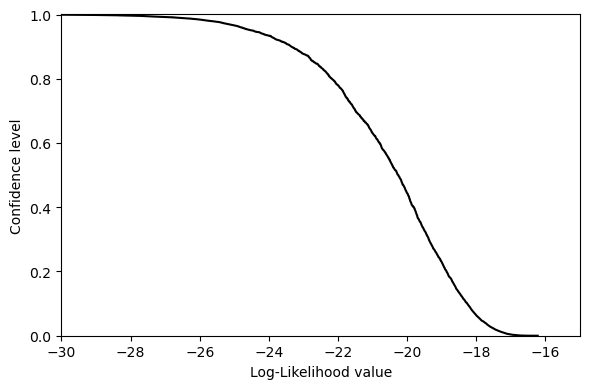

In [22]:
import matplotlib.pyplot as plt

"""
Plot the confidence level (posterior volume from highest to lowest likelihood value)  
as a function of the log-likelihood value.
"""

plt.figure(figsize = (6,4))
plt.plot(logl_values_sorted, confidence_levels, color = 'black')
plt.xlabel('Log-Likelihood value')
plt.ylabel('Confidence level')
plt.xlim(-30,-15)
plt.ylim(0,1 + 0.001)
plt.tight_layout()
plt.show()


In [ ]:
"""
To obtain the truly most probable composition, find the composition w
that maximizes log-likelihood × prior.

To obtain the 95% confidence interval for the proton fraction:
1. Find the compositions with the lowest and highest proton fractions
   among those with log-likelihood ≥ logL at confidence level = 0.95.
2. These bounds define the 95% confidence interval for the proton fraction.

A similar approach can be used to compute confidence intervals
for more complicated quantities derived from the posterior.
"""